# 모델 `H(x) = Wx` 에 대해

# 이론적으로 선형 회귀 구현  

In [8]:
# 이론적으로 선형 회귀 구현 

import torch 

# x 와 y 관계
x = torch.FloatTensor([[1], [2], [3]]) 
y = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
lr = 0.1

# epoch 데이터로 학습한 횟수 
nb_epoch = 30 
for epoch in range(nb_epoch+1):
    #H(x) 계산
    # 편의를 위해 b 설정 안함 
    hypothesis = W*x
    cost = torch.mean((hypothesis-y)**2) # 비용 함수 
    gradient = torch.sum((W*x-y)*x) # 미분으로 얻은 기울기 
    print(f"Epoch:{epoch} W:{round(W.item(),5)} cost: {cost.item()}")
    # 반복하면 기울기 0 에 근접 
    # cost gradient 로 H(x) 개선 
    W = W-lr*gradient 
    
    
# 기울기 2, 비용함수 값 0    

Epoch:0 W:0.0 cost: 18.66666603088379
Epoch:1 W:2.8 cost: 2.986665964126587
Epoch:2 W:1.68 cost: 0.47786661982536316
Epoch:3 W:2.128 cost: 0.0764586329460144
Epoch:4 W:1.9488 cost: 0.01223334576934576
Epoch:5 W:2.02048 cost: 0.0019573161844164133
Epoch:6 W:1.99181 cost: 0.00031316839158535004
Epoch:7 W:2.00328 cost: 5.010871609556489e-05
Epoch:8 W:1.99869 cost: 8.01678925199667e-06
Epoch:9 W:2.00052 cost: 1.282486323361809e-06
Epoch:10 W:1.99979 cost: 2.0514117693437584e-07
Epoch:11 W:2.00008 cost: 3.2867927046709156e-08
Epoch:12 W:1.99997 cost: 5.2898676550228174e-09
Epoch:13 W:2.00001 cost: 8.683589958202731e-10
Epoch:14 W:1.99999 cost: 1.3773160389973782e-10
Epoch:15 W:2.0 cost: 2.252894225340807e-11
Epoch:16 W:2.0 cost: 4.2443084637133754e-12
Epoch:17 W:2.0 cost: 1.0610771159283439e-12
Epoch:18 W:2.0 cost: 3.979039320256561e-13
Epoch:19 W:2.0 cost: 3.979039320256561e-13
Epoch:20 W:2.0 cost: 9.947598300641403e-14
Epoch:21 W:2.0 cost: 0.0
Epoch:22 W:2.0 cost: 0.0
Epoch:23 W:2.0 cost:

# torch.optim 사용


- 파이토치에는 gradient 계산을 쉽게 하도록 torch.optim 모듈을 제공 
- 시작할 때 Optimizer 정의
- Optimizer 를 정의하기 위해서는 학습 가능한 변수들과 lr 을 알아야 한다. 
```py
optimizer = optim.SGD([W],lr=0.15)
``` 
- cost 로 H(x) 개선 
- optimizer.zero_grad() 로 gradient 를 0 으로 초기화
- cost.backward() 로 gradient 계산
- optimizer.step() 으로 gradient descent 
```py
optimizer.zero_grad()
cost.backward()
optimizer.step()
```


In [13]:
import torch
from torch import optim
x = torch.FloatTensor([[1], [2], [3]]) 
y = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)

# 먼저 비용함수를 계산한 후 아래 세 줄로 경사 하강법 구현 
# 옵티마이저는 W 의 gradient 저장한 후, W 값을 gradient 에 맞게 업데이트 
optimizer = optim.SGD([W],lr=0.15) 

nb_epoch = 25 
for epoch in range(nb_epoch+1):
    #H(x) 계산
    hypothesis = W*x 
    cost = torch.mean((hypothesis-y)**2) # 비용 함수  
    print(f"Epoch:{epoch} W:{round(W.item(),5)} cost: {cost.item()}")
    optimizer.zero_grad()
    cost.backward()
    optimizer.step() 

Epoch:0 W:0.0 cost: 18.66666603088379
Epoch:1 W:2.8 cost: 2.9866678714752197
Epoch:2 W:1.68 cost: 0.4778672158718109
Epoch:3 W:2.128 cost: 0.0764586329460144
Epoch:4 W:1.9488 cost: 0.01223334576934576
Epoch:5 W:2.02048 cost: 0.0019573161844164133
Epoch:6 W:1.99181 cost: 0.00031316839158535004
Epoch:7 W:2.00328 cost: 5.010871609556489e-05
Epoch:8 W:1.99869 cost: 8.01678925199667e-06
Epoch:9 W:2.00052 cost: 1.282486323361809e-06
Epoch:10 W:1.99979 cost: 2.0514117693437584e-07
Epoch:11 W:2.00008 cost: 3.2867927046709156e-08
Epoch:12 W:1.99997 cost: 5.2898676550228174e-09
Epoch:13 W:2.00001 cost: 8.683589958202731e-10
Epoch:14 W:1.99999 cost: 1.3773160389973782e-10
Epoch:15 W:2.0 cost: 2.252894225340807e-11
Epoch:16 W:2.0 cost: 4.2443084637133754e-12
Epoch:17 W:2.0 cost: 1.0610771159283439e-12
Epoch:18 W:2.0 cost: 3.979039320256561e-13
Epoch:19 W:2.0 cost: 3.979039320256561e-13
Epoch:20 W:2.0 cost: 9.947598300641403e-14
Epoch:21 W:2.0 cost: 0.0
Epoch:22 W:2.0 cost: 0.0
Epoch:23 W:2.0 cost:

## 자동미분

경사 하강법 : 비용 함수를 미분하여 이 함수의 기울기(gradient)를 구해서 비용이 최소화 되는 방향을 찾아내는 알고리즘
- 비용 함수를 손실 함수, 오차 함수라고도 부르므로 비용이 최소화 되는 방향이라는 표현 대신 손실이 최소화 되는 방향 또는  오차를 최소화 되는 방향이라고도 설명할 수 있음. 
- 모델이 복잡해질수록 경사 하강법을 넘파이 등으로 직접 코딩하는 것은 까다로움.
- 파이토치에서는 이런 수고를 하지 않도록 자동 미분(Autograd)을 지원
- 자동 미분을 사용하면 미분 계산을 자동화하여 경사 하강법 사용이 용이

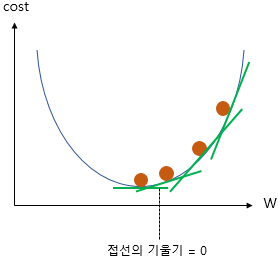

In [22]:
import torch

# required_grad를 True로 설정 : 이 텐서에 대한 기울기를 저장하겠다는 의미 
w = torch.tensor(2.0,requires_grad=True)
print("w",w.item())
y = pow(w,3)
z = 2*y + 5
# 해당 수식에 대한 기울기를 계산
print(z.backward(retain_graph=True))
# w.grad를 출력하면 w가 속한 수식을 w로 미분한 값이 저장된 것을 확인 
 
print('수식을 w로 미분한 값 : {}'.format(w.grad)) 

w 2.0
None
수식을 w로 미분한 값 : 24.0


하나의 정보로부터 추측하는 모델 만듬
ex) 수업 참여도 -> 수업점수, 총 수면시간-> 집중력

대부분의 추측은 많은 정보를 추합해서 이루어짐
ex) 쪽지시험 성적들 -> 중간고사 성적, 암의위치,넓이,모양 -> 치료 성공률